# K-Fold CV for Boosting Methods Using SKLearn 

In [70]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install -c conda-forge lightgbm

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1
  - anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29

In [8]:
import xgboost as xgb
from sklearn import metrics
from lightgbm import LGBMClassifier

import lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats

### To load sklearn dataset
sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)[source]¶

Load and return the breast cancer wisconsin dataset (classification).

In [110]:
df = pd.read_csv('SRER21_dataset_v1.csv', na_values='?').dropna()
df2 = pd.read_csv('SRER_2017_training_bi.csv', na_values='?').dropna()
df3 = pd.concat(([df,df2]),ignore_index=True)
df3.isnull().sum()
df3.dropna(axis=0,inplace=True)
df3= df3.replace('woody',1)
df3= df3.replace('non-woody',0)
del df3['OID_']
del df3['Id']
del df3['gridcode']
del df3['Shape_Length']
del df3['Shape_Area']
df3

,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,1.000000,0.273945,0.273945,0.273945,0.323257,0.323257,0.323257,0.428208,0.428208,0.428208,0.311936,0.311936,0.311936,1
1,1.000000,0.530157,0.530157,0.530157,0.460513,0.460513,0.460513,0.611745,0.611745,0.611745,0.416492,0.416492,0.416492,1
2,0.920000,0.477979,0.501013,0.616707,0.381095,0.384718,0.447304,0.576437,0.596638,0.673767,0.359786,0.364317,0.414173,1
3,1.000000,0.342944,0.342944,0.342944,0.346714,0.346714,0.346714,0.468738,0.468738,0.468738,0.323907,0.323907,0.323907,1
4,0.142857,0.044382,-0.008903,0.265536,0.181714,0.147391,0.315684,0.223522,0.178629,0.412030,0.177739,0.147325,0.299311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,0.020000,0.290182,0.290182,0.290182,0.283959,0.283959,0.283959,0.419200,0.419200,0.419200,0.269486,0.269486,0.269486,1
11140,0.020000,0.408320,0.408320,0.408320,0.372648,0.372648,0.372648,0.510469,0.510469,0.510469,0.340879,0.340879,0.340879,1
11141,0.015000,0.413297,0.413297,0.437195,0.234926,0.234926,0.235606,0.485601,0.485601,0.499074,0.226722,0.226722,0.227606,1
11142,0.015000,0.550652,0.550652,0.570094,0.388085,0.388085,0.416298,0.621694,0.621694,0.640722,0.363288,0.363288,0.387576,1


# Extreme Gradient Boosting

1.5.0


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


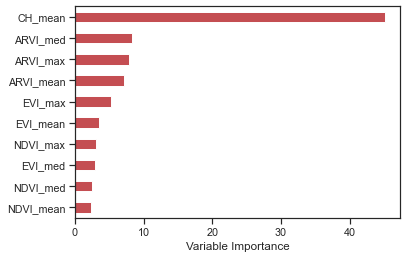

roc_auc_score 0.8785275371654264


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


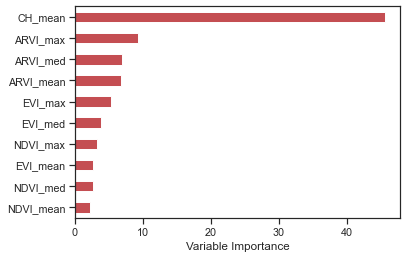

roc_auc_score 0.8757480224499656


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


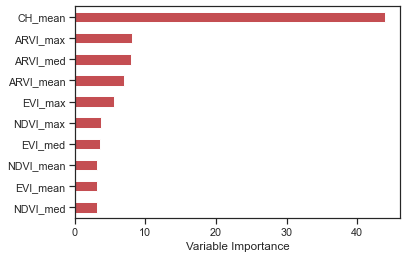

roc_auc_score 0.869879085571908


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


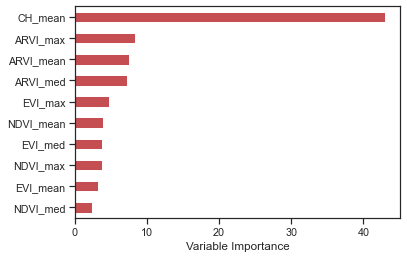

roc_auc_score 0.8837498088912293


C:\Users\hmche\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


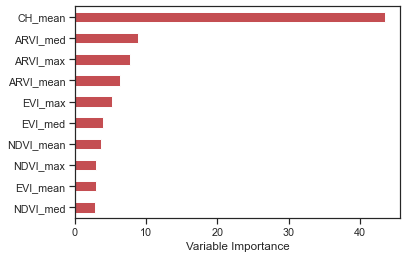

roc_auc_score 0.8633254215371005
---Run time is 9.255578000000241 seconds ---

Accuracy of each fold: 
 [0.7967698519515478, 0.7873485868102288, 0.7873485868102288, 0.8012561686855092, 0.7809694793536804]

Avg accuracy : 
0.790738534722239

Std of accuracy : 
0.00728581290168969


In [111]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

# check xgboost version

import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
print(xgboost.__version__)
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

#Implementing cross validation 
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=True)
#random_state = sets the seed
#shuffle = randomization
# Create the Extreme GBM
model = XGBClassifier(n_estimators=100, learning_rate = 0.1,use_label_encoder =False,verbose=None,
                max_depth = 5, eval_metric='logloss')
    
from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];

for train_index, test_index in kf.split(df3):
    X_train , X_test = df3.iloc[train_index,:-1], df3.iloc[test_index,:-1]
    Y_train , Y_test = df3.iloc[train_index,-1], df3.iloc[test_index,-1]
    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)
    Truth.extend(Y_test.values.reshape(Y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 

        #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    plt.show()
        #plt.savefig('plot1.png')

        ##################################################
        #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
        #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    print("roc_auc_score", roc_auc_score(Y_test, pred_prob))

elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

# Reference: 

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.

learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.

n_estimators (int, optional (default=100)) – Number of boosted trees to fit.

eval_metric (str, callable, list or None, optional (default=None)) – If str, it should be a built-in evaluation metric to use. If callable, it should be a custom evaluation metric, see note below for more details. If list, it can be a list of built-in metrics, a list of custom evaluation metrics, or a mix of both. In either case, the metric from the model parameters will be evaluated and used as well. 
Default: ‘l2’ for LGBMRegressor, **‘logloss’ for LGBMClassifier**, ‘ndcg’ for LGBMRanker.


[1]	training's binary_logloss: 0.63245	valid_0's binary_logloss: 0.634368
[2]	training's binary_logloss: 0.603217	valid_0's binary_logloss: 0.607079
[3]	training's binary_logloss: 0.578411	valid_0's binary_logloss: 0.583799
[4]	training's binary_logloss: 0.556888	valid_0's binary_logloss: 0.564125
[5]	training's binary_logloss: 0.538449	valid_0's binary_logloss: 0.547187
[6]	training's binary_logloss: 0.522178	valid_0's binary_logloss: 0.532147
[7]	training's binary_logloss: 0.507861	valid_0's binary_logloss: 0.519003
[8]	training's binary_logloss: 0.495211	valid_0's binary_logloss: 0.507044
[9]	training's binary_logloss: 0.484012	valid_0's binary_logloss: 0.496943
[10]	training's binary_logloss: 0.474128	valid_0's binary_logloss: 0.487926
[11]	training's binary_logloss: 0.465012	valid_0's binary_logloss: 0.47943
[12]	training's binary_logloss: 0.457107	valid_0's binary_logloss: 0.47266
[13]	training's binary_logloss: 0.44987	valid_0's binary_logloss: 0.465958
[14]	training's binary_lo

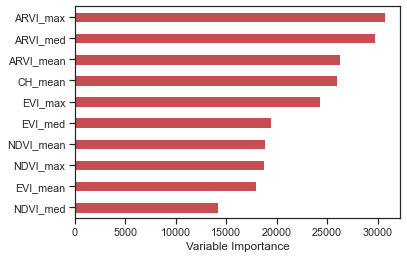

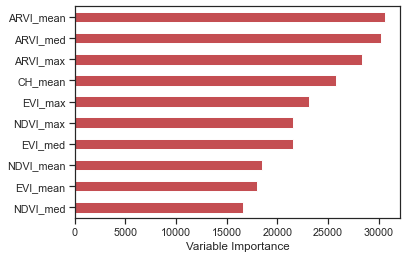

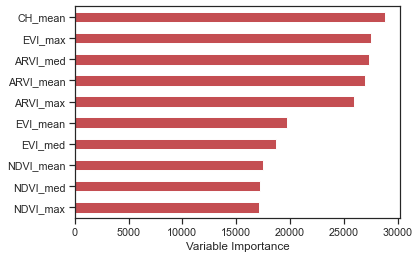

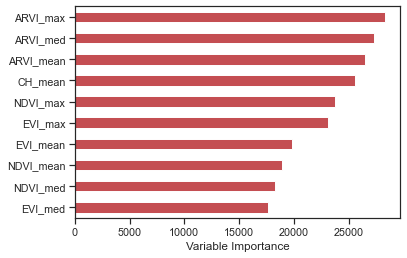

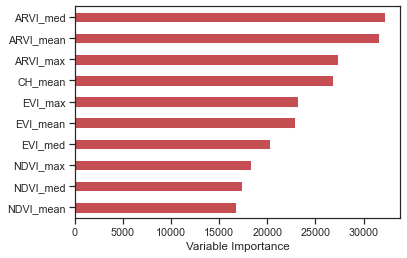

In [112]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm

#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(df3):
    
    X_train , X_test = df3.iloc[train_index,:-1], df3.iloc[test_index,:-1]
    Y_train , Y_test = df3.iloc[train_index,-1], df3.iloc[test_index,-1]
    
    # Create the LightGBM data containers
    model.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],
          eval_metric='logloss')

    pred_values = model.predict(X_test)
     
    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(Y_test.values.reshape(Y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

In [113]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))

[[3203 1115]
 [1254 5572]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4318
           1       0.83      0.82      0.82      6826

    accuracy                           0.79     11144
   macro avg       0.78      0.78      0.78     11144
weighted avg       0.79      0.79      0.79     11144



# CatBoosting

In [103]:
conda install -c conda-forge catboost

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openss

In [104]:
# https://catboost.ai/en/docs/concepts/python-quickstart
import catboost as cb
from catboost import CatBoostClassifier


print ('catboost version', cb.__version__)

catboost version 1.0.6


---Run time is 4.480172699999457 seconds ---

Accuracy of each fold: 
 [0.7967698519515478, 0.7837595334230597, 0.7801704800358905, 0.7990130103185284, 0.7805206463195691]

Avg accuracy : 
0.7880467044097192

Std of accuracy : 
0.008165898164368171


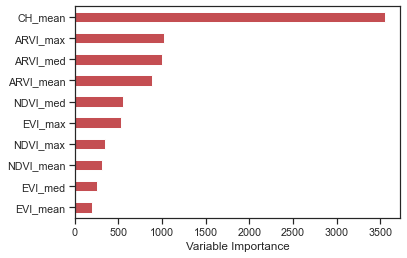

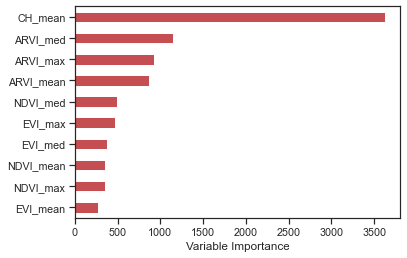

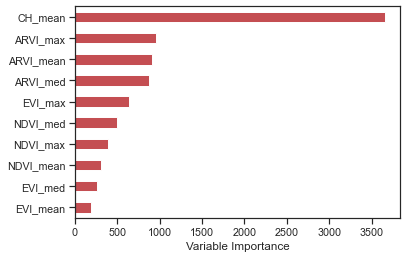

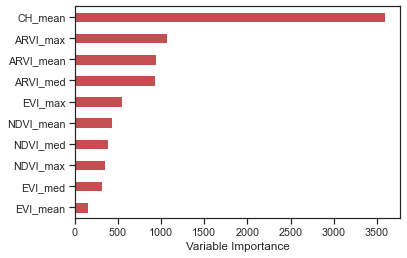

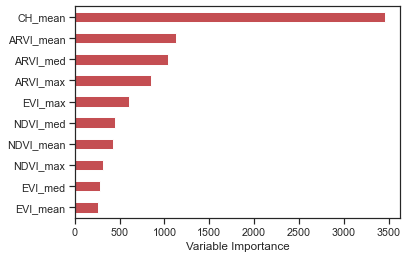

In [105]:
#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(df3):
    
    X_train , X_test = df3.iloc[train_index,:-1], df3.iloc[test_index,:-1]
    y_train , y_test = df3.iloc[train_index,-1], df3.iloc[test_index,-1]
    
    # Create CatBoost model
    model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss')
    # train the model
    model.fit(X_train, y_train, verbose=False)
    
    # make the prediction using the resulting model
    pred_values = model.predict(X_test)
    #preds_proba = model.predict_proba(test_data)
    #print("class = ", preds_class)
    #print("proba = ", preds_proba)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

In [107]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))

[[3258 1060]
 [1302 5524]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      4318
           1       0.84      0.81      0.82      6826

    accuracy                           0.79     11144
   macro avg       0.78      0.78      0.78     11144
weighted avg       0.79      0.79      0.79     11144



# Please neglect: The following are some codes to be developed

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.Dataset.html